In [118]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# INPUT DỮ LIỆU

In [ ]:
df = pd.read_csv('data_science_salaries.csv')
# print(df.columns.value_counts())
print(df['experience_level'].value_counts())
print()
print(df['company_size'].value_counts())
print()
print(df['employment_type'].value_counts())
print()
print(df['work_models'].value_counts())
print()
print(df['work_year'].value_counts())
print()
print(df['salary_in_usd'].value_counts())

experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64

company_size
Medium    5860
Large      569
Small      170
Name: count, dtype: int64

employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64

work_models
On-site    3813
Remote     2561
Hybrid      225
Name: count, dtype: int64

work_year
2023    4625
2022    1112
2024     571
2021     216
2020      75
Name: count, dtype: int64

salary_in_usd
100000    102
150000     98
120000     86
160000     72
130000     71
         ... 
249600      1
122720      1
151700      1
239900      1
91237       1
Name: count, Length: 2147, dtype: int64


# Chuẩn hoá input

In [45]:
experience_level_map = {
    'Senior-level': 0,
    'Mid-level': 1,
    'Entry-level':2,
    'Executive-level':3
}

df['experience_level_coded'] = df['experience_level'].map(experience_level_map)
print(df['experience_level_coded'])

company_size_map = {
    'Medium': 0,
    'Large': 1,
    'Small': 2,
}

df['company_size_coded'] = df['company_size'].map(company_size_map)
print(df['company_size_coded'])

employment_type_map = {
    'Full-time': 0,
    'Contract': 1,
    'Part-time':2,
    'Freelance':3
}

df['employment_type_coded'] = df['employment_type'].map(employment_type_map)
print(df['employment_type_coded'])

work_models_map = {
    'On-site':0,
    'Remote': 1,
    'Hybrid': 2, 
}

df['work_models_coded'] = df['work_models'].map(work_models_map)
print(df['work_models_coded'])

work_year_map = {
    2024: 0, 
    2023: 1,
    2022: 2,
    2021: 3,
    2020: 4,
}

df['work_year_coded'] = df['work_year'].map(work_year_map)
print(df['work_year_coded'])


coded_columns = [
	'experience_level_coded',
	'company_size_coded',
	'employment_type_coded',
	'work_models_coded',
	'work_year_coded'
]

# INPUT
input = df[coded_columns]

0       1
1       1
2       0
3       0
4       1
       ..
6594    2
6595    3
6596    0
6597    1
6598    0
Name: experience_level_coded, Length: 6599, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
6594    1
6595    0
6596    1
6597    1
6598    2
Name: company_size_coded, Length: 6599, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
6594    1
6595    0
6596    0
6597    0
6598    0
Name: employment_type_coded, Length: 6599, dtype: int64
0       1
1       1
2       1
3       1
4       0
       ..
6594    2
6595    0
6596    2
6597    2
6598    0
Name: work_models_coded, Length: 6599, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
6594    4
6595    4
6596    4
6597    4
6598    4
Name: work_year_coded, Length: 6599, dtype: int64


# Chuẩn hoá output

In [ ]:
# Z-SCORE
output = df['salary_in_usd']
output_mean = output.mean()
output_std = output.std()

print(output_mean)
print(output_std)
print(output.max())
print(output.min())

# OUTPUT
output_zscore = (output - output_mean)/ output_std

print(output_zscore.mean())
print(output_zscore.std())
print(output_zscore.max())
print(output_zscore.min())


145560.55856948023
70946.83806953009
750000
15000
-5.1683666186520395e-17
1.0000000000000027
8.519610709615424
-1.8402590181894627
6599


In [80]:
rate = 8/10
train_rate = int(rate * 6599)



train_dataset = TensorDataset(
    torch.tensor(input.iloc[:train_rate].values, dtype=torch.float),
    torch.tensor(output_zscore[:train_rate].values, dtype=torch.float)
)

test_dataset = TensorDataset(
    torch.tensor(input.iloc[train_rate:].values,  dtype=torch.float),
    torch.tensor(output_zscore[train_rate:].values,  dtype=torch.float)
)


train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

# input_sample, output_sample = next(iter(train_loader))
# print(input_sample, output_sample)

In [74]:
model = nn.Sequential(
    nn.Linear(5, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
)

def layer_init(model):
    for m in model:
        if isinstance(m, nn.Linear):
            torch.nn.init.uniform_(m.weight)
            torch.nn.init.uniform_(m.bias)

layer_init(model)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [95]:
epochs = 5000
loss_arr = []
model.train()
for epoch in range(epochs):
    if epoch % 100 == 0:
        print(f'Epoch {epoch}')
    for data in train_loader:
        features, targets = data
        pred = model(features)

        loss = criterion(pred.squeeze(), targets)
        loss.backward()
        loss_arr.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()
    


Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900
Epoch 1000
Epoch 1100
Epoch 1200
Epoch 1300
Epoch 1400
Epoch 1500
Epoch 1600
Epoch 1700
Epoch 1800
Epoch 1900
Epoch 2000
Epoch 2100
Epoch 2200
Epoch 2300
Epoch 2400
Epoch 2500
Epoch 2600
Epoch 2700
Epoch 2800
Epoch 2900
Epoch 3000
Epoch 3100
Epoch 3200
Epoch 3300
Epoch 3400
Epoch 3500
Epoch 3600
Epoch 3700
Epoch 3800
Epoch 3900
Epoch 4000
Epoch 4100
Epoch 4200
Epoch 4300
Epoch 4400
Epoch 4500
Epoch 4600
Epoch 4700
Epoch 4800
Epoch 4900


In [117]:
def denormalize_zscore(zscore):
    return zscore * output_std + output_mean

model.eval()

test_target = []
test_pred = []

with torch.no_grad():
    for data in test_loader:
        features, targets = data
        pred = model(features)

        test_target.extend(targets)
        test_pred.extend(pred)

print(f'Target zscore: ', np.array(test_target[-5:]))
print(f'Pred zscore: ', np.array(test_pred[-5:]).reshape(-1))

print(f'Target: ', denormalize_zscore(np.array(test_target[-5:])))
print(f'Pred: ', denormalize_zscore(np.array(test_pred[-5:])).reshape(-1))

Target zscore:  [-1.4208887  -1.8402591  -0.4010969  -1.006818   -0.76569384]
Pred zscore:  [-1.7527794  -0.1821064  -0.43994752 -0.8914865  -0.01280823]
Target:  [ 44753.008  15000.    117104.01   74130.01   91237.01 ]
Pred:  [ 21206.414 132640.69  114347.68   82312.414 144651.86 ]


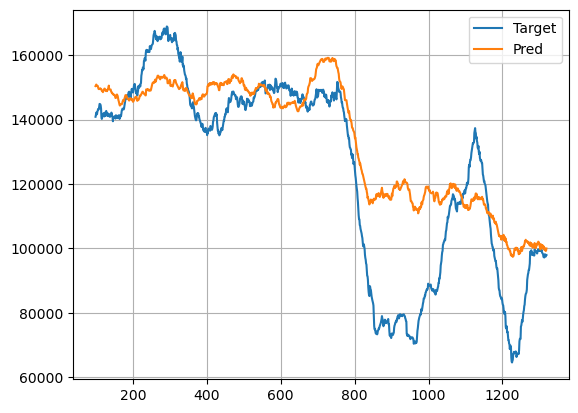

In [128]:
Y1 = denormalize_zscore(np.array(test_target))
Y2 = denormalize_zscore(np.array(test_pred)).flatten()

def smoothen(value):
    value = pd.Series(value)
    value = value.rolling(window=100).mean()
    return value

fig, ax = plt.subplots()

ax.plot(smoothen(Y1), label='Target')
ax.plot(smoothen(Y2), label='Pred')

ax.grid()
ax.legend()

plt.show()